In [1]:
from ms_data_funcs import *
from transformer_funcs import *

import torch
import pandas as pd
from sklearn.preprocessing import LabelEncoder

In [2]:
if torch.cuda.is_available():
    print("CUDA is available.")
    print("PyTorch version:", torch.__version__)
    print("CUDA version:", torch.version.cuda)
    print("Number of available GPUs:", torch.cuda.device_count())
    print("GPU name:", torch.cuda.get_device_name(0))
else:
    print("CUDA is not available.")

CUDA is available.
PyTorch version: 2.1.0+cu121
CUDA version: 12.1
Number of available GPUs: 1
GPU name: NVIDIA GeForce RTX 4060 Laptop GPU


In [3]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cuda


In [4]:
df = pd.read_csv('data/MoNA/in-silico-SMILES.csv') 
print(f"Original shape: {df.shape}")

/tmp/ipykernel_60017/3583281888.py:1: DtypeWarning: Columns (7,8,11,13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('data/MoNA/in-silico-SMILES.csv')


Original shape: (1837926, 18)


In [5]:
# Minimal test
df = df.sample(5000)

In [6]:
method='direct'

In [7]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df['molecular_formula'])
max_mz = calculate_max_mz(df)

In [8]:
df['molecular_formula'].unique().shape

(3068,)

In [9]:
smiles_vocabs = get_or_create_smiles_vocabs(df)

Loading existing character vocabulary...
SMILES vocabulary size (character): 27
Loading existing atom_wise vocabulary...
SMILES vocabulary size (atom_wise): 10
Loading existing substructure vocabulary...
SMILES vocabulary size (substructure): 8536


In [10]:
results = {}
print(f"\nSpectra tokenized with {method} tokenization:")
print(f"\nSMILES tokenized with {'character'} tokenization")
smiles_vocab = smiles_vocabs['character']

train_loader, test_loader = load_tokenized_data_with_smiles(df, df, 
                                                            method, 
                                                            smiles_vocab, 
                                                            max_mz=max_mz)

#num_classes = len(label_encoder.classes_)
smiles_vocab_size = len(smiles_vocab)

# sample batch used for input dimensions
sample_batch, target_batch = next(iter(train_loader))
print("Spectra shape:", sample_batch.shape)
print("SMILES shape:", target_batch.shape)
embed_depth = sample_batch.shape[3]


Spectra tokenized with direct tokenization:

SMILES tokenized with character tokenization
Spectra shape: torch.Size([32, 1, 110, 16])
SMILES shape: torch.Size([32, 116])


In [11]:
model = MS_VIT_Seq2Seq(
    smiles_vocab_size=len(smiles_vocab),
    embed_depth=embed_depth,
    d_model=64,           # Reduced from 256
    nhead=4,              # Reduced from 8
    num_layers=2,         # Reduced from 6
    dim_feedforward=256,  # Reduced from 2048
    dropout=0.1,
    num_classes=None
)

/home/kyle/anaconda3/envs/ml/lib/python3.11/site-packages/torch/nn/modules/transformer.py:282: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")


In [12]:
optimizer = optim.Adam(model.parameters(), lr=0.0001)
criterion_cls = nn.CrossEntropyLoss()
criterion_seq = nn.CrossEntropyLoss()#ignore_index=smiles_vocab['<pad>'])

model_char, history_char = train_model_seq2seq(model, train_loader, test_loader, 
                                     optimizer, criterion_seq, 
                                     num_epochs=50, evaluate=True, verbose=1,
                                     checkpoint_path="./model_checkpoints/",
                                     meta_tag=(method+"_character"))

Saving checkpoints to ./model_checkpoints/checkpoint_13


Epoch 1/50 [Train]:   0%|          | 0/157 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 2/50 [Train]:   0%|          | 0/157 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 3/50 [Train]:   0%|          | 0/157 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 4/50 [Train]:   0%|          | 0/157 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 5/50 [Train]:   0%|          | 0/157 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 6/50 [Train]:   0%|          | 0/157 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 7/50 [Train]:   0%|          | 0/157 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 8/50 [Train]:   0%|          | 0/157 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 9/50 [Train]:   0%|          | 0/157 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 10/50 [Train]:   0%|          | 0/157 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 11/50 [Train]:   0%|          | 0/157 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 12/50 [Train]:   0%|          | 0/157 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 13/50 [Train]:   0%|          | 0/157 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 14/50 [Train]:   0%|          | 0/157 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 15/50 [Train]:   0%|          | 0/157 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 16/50 [Train]:   0%|          | 0/157 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 17/50 [Train]:   0%|          | 0/157 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 18/50 [Train]:   0%|          | 0/157 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 19/50 [Train]:   0%|          | 0/157 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 20/50 [Train]:   0%|          | 0/157 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 21/50 [Train]:   0%|          | 0/157 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 22/50 [Train]:   0%|          | 0/157 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 23/50 [Train]:   0%|          | 0/157 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 24/50 [Train]:   0%|          | 0/157 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 25/50 [Train]:   0%|          | 0/157 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 26/50 [Train]:   0%|          | 0/157 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 27/50 [Train]:   0%|          | 0/157 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 28/50 [Train]:   0%|          | 0/157 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 29/50 [Train]:   0%|          | 0/157 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 30/50 [Train]:   0%|          | 0/157 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 31/50 [Train]:   0%|          | 0/157 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 32/50 [Train]:   0%|          | 0/157 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 33/50 [Train]:   0%|          | 0/157 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 34/50 [Train]:   0%|          | 0/157 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 35/50 [Train]:   0%|          | 0/157 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 36/50 [Train]:   0%|          | 0/157 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 37/50 [Train]:   0%|          | 0/157 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 38/50 [Train]:   0%|          | 0/157 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 39/50 [Train]:   0%|          | 0/157 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 40/50 [Train]:   0%|          | 0/157 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 41/50 [Train]:   0%|          | 0/157 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 42/50 [Train]:   0%|          | 0/157 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 43/50 [Train]:   0%|          | 0/157 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 44/50 [Train]:   0%|          | 0/157 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 45/50 [Train]:   0%|          | 0/157 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 46/50 [Train]:   0%|          | 0/157 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 47/50 [Train]:   0%|          | 0/157 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 48/50 [Train]:   0%|          | 0/157 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 49/50 [Train]:   0%|          | 0/157 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 50/50 [Train]:   0%|          | 0/157 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/157 [00:00<?, ?it/s]

In [13]:
results_char = evaluate_model_seq2seq(model, test_loader, smiles_vocab, test=True)

Sequence Accuracy: 0.9997
Average Sequence Loss: 0.0023
Valid SMILES Percentage: 99.02%
Average Tanimoto Similarity: 0.9984
Average Dice Similarity: 0.9991
Average Edit Distance: 0.04

True SMILES: O=C(OCCCCCC=CC=CCCCCCCCCCCCCC(=O)NC(CO)C(O)CCCCCCCCCCCCCCCCC)CCCCCCCC=CCC=CCCCCC
Pred SMILES: O=C(OCCCCCC=CC=CCCCCCCCCCCCCC(=O)NC(CO)C(O)CCCCCCCCCCCCCCCCC)CCCCCCCC=CCC=CCCCCC

True SMILES: O=C(NC(COP(=O)([O-])OCC[N+](C)(C)C)C(O)C=CCCC=CCCCCCCCCCCC)CCCCCCCCC=CCC=CCC=CCCCCC
Pred SMILES: O=C(NC(COP(=O)([O-])OCC[N+](C)(C)C)C(O)C=CCCC=CCCCCCCCCCCC)CCCCCCCCC=CCC=CCC=CCCCCC

True SMILES: O=C(NC(CO)C(O)CCCCC)CCCCCCCCCCCC=CCCCCCCCC
Pred SMILES: O=C(NC(CO)C(O)CCCCC)CCCCCCCCCCCC=CCCCCCCCC

True SMILES: O=C(O)CCCCCCCCCCCCC(OC(=O)CCCCCCCC=CCC=CCC=CCC=CCC=CCC)C
Pred SMILES: O=C(O)CCCCCCCCCCCCC(OC(=O)CCCCCCCC=CCC=CCC=CCC=CCC=CCC)C

True SMILES: O=C(OCCCCCCCCCCCCCCC=CCCCCCCCCCCCCCCC(=O)NC(CO)C(O)CCCCCCCCCCCCCCCCCCCCCC)CCCCCCCC=CCCCCCC
Pred SMILES: O=C(OCCCCCCCCCCCCCCC=CCCCCCCCCCCCCCCC(=O)NC(CO)C(O)CCCCCCCCC

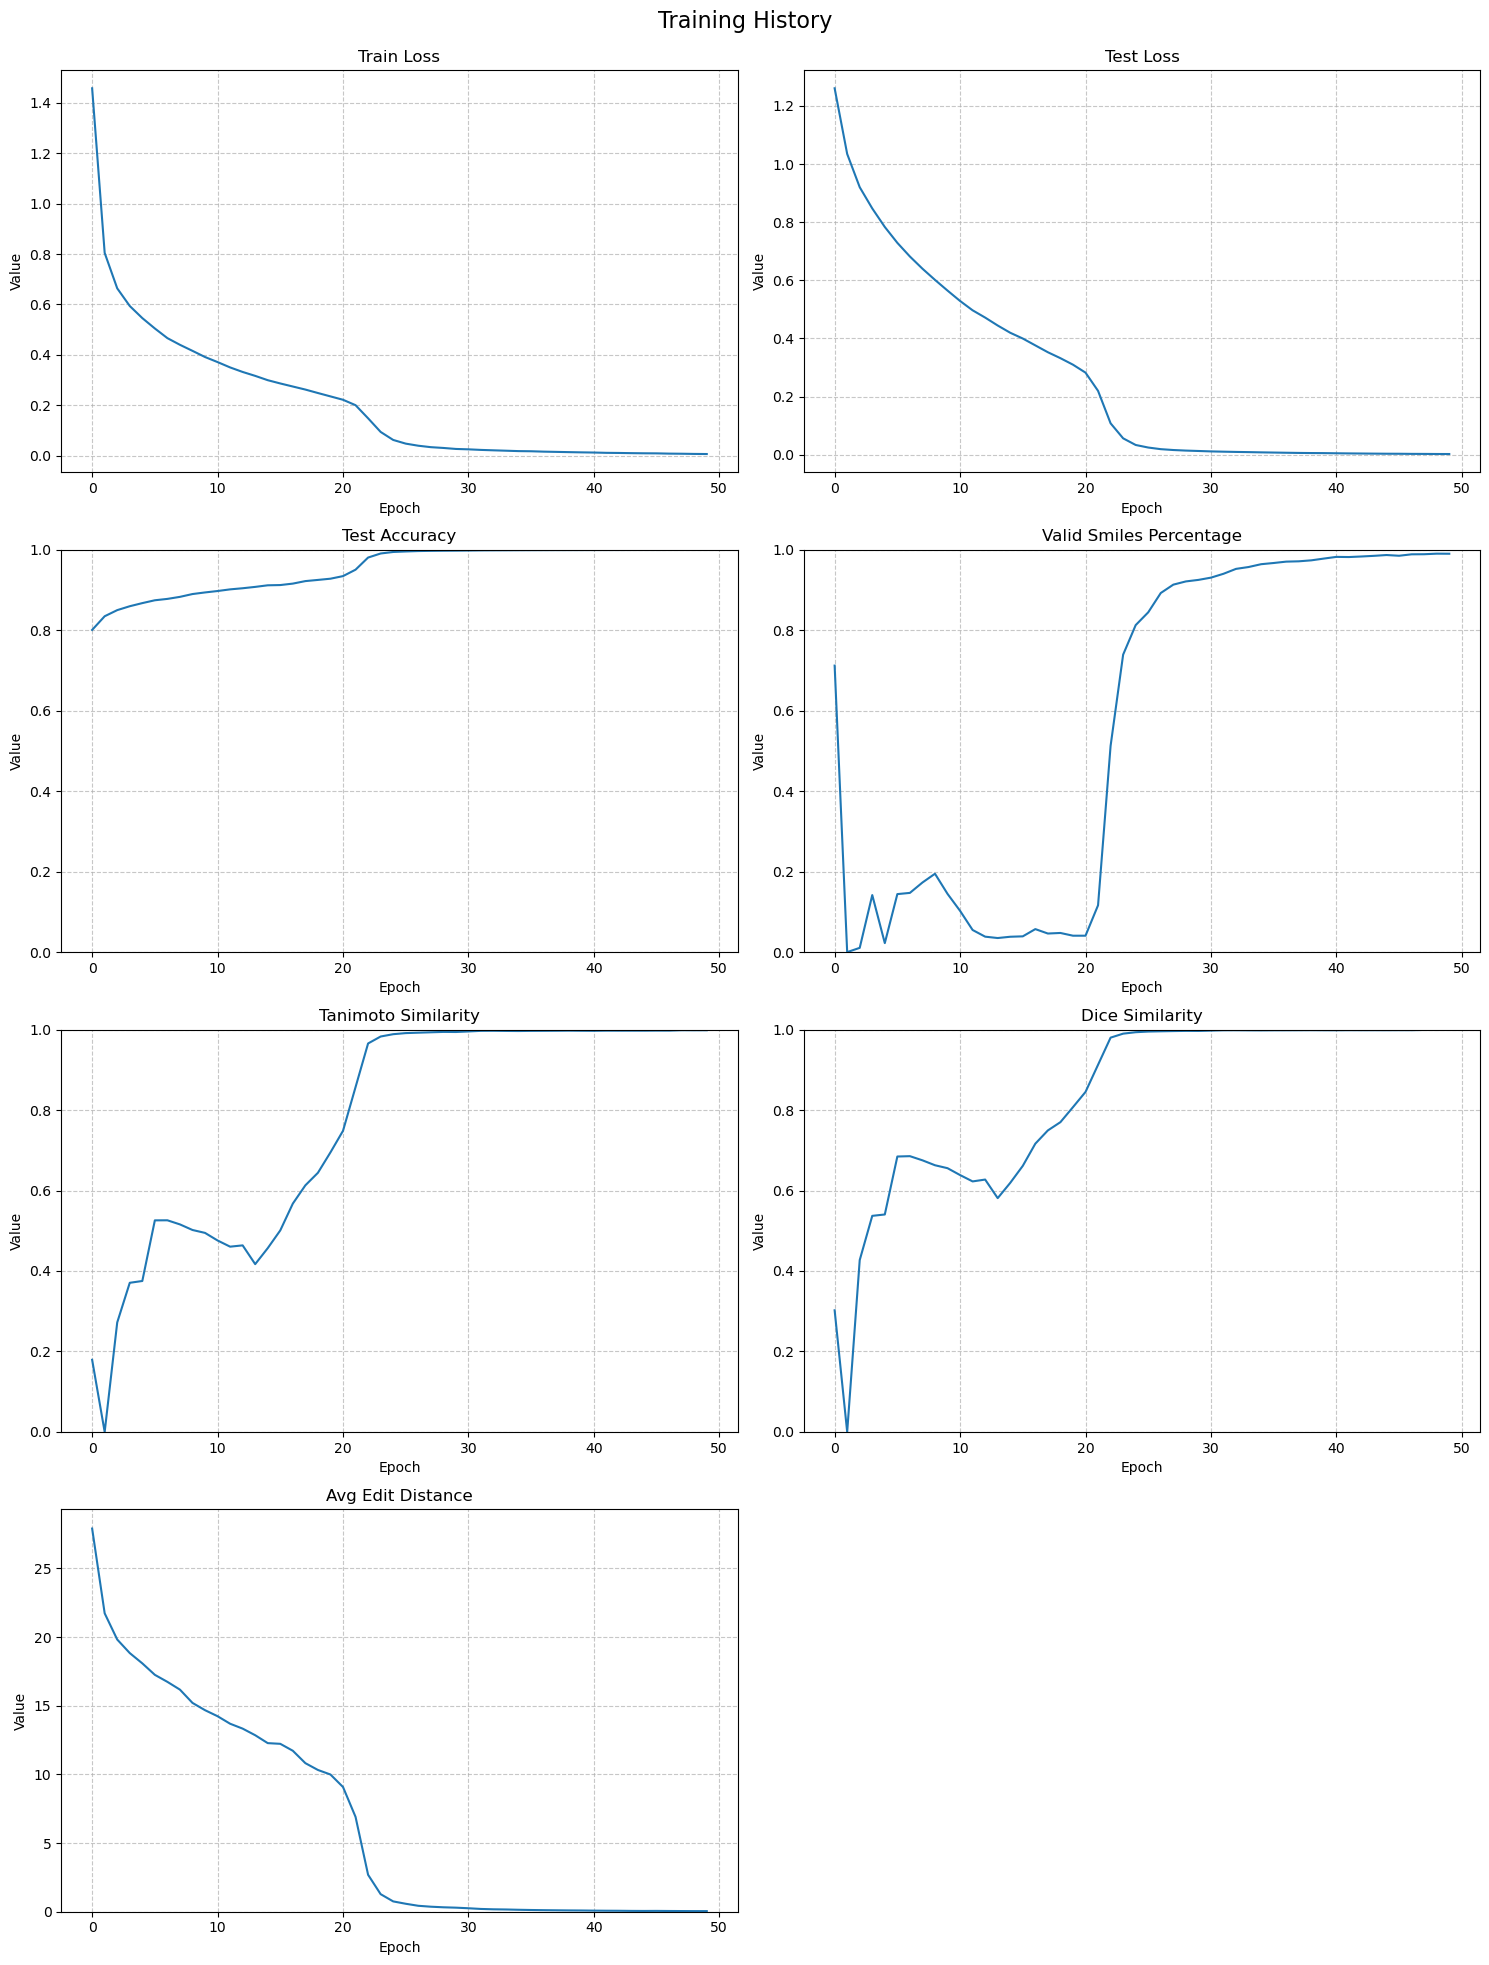

In [14]:
plot_training_history(history_char)

In [15]:
results = {}
print(f"\nSpectra tokenized with {method} tokenization:")
print(f"\nSMILES tokenized with {'atom_wise'} tokenization")
smiles_vocab = smiles_vocabs['atom_wise']

train_loader, test_loader = load_tokenized_data_with_smiles(df, df, 
                                                            method, 
                                                            smiles_vocab, 
                                                            max_mz=max_mz)

#num_classes = len(label_encoder.classes_)
smiles_vocab_size = len(smiles_vocab)

# sample batch used for input dimensions
sample_batch, target_batch = next(iter(train_loader))
print("Spectra shape:", sample_batch.shape)
print("SMILES shape:", target_batch.shape)
embed_depth = sample_batch.shape[3]


Spectra tokenized with direct tokenization:

SMILES tokenized with atom_wise tokenization
Spectra shape: torch.Size([32, 1, 110, 16])
SMILES shape: torch.Size([32, 114])


In [16]:
model = MS_VIT_Seq2Seq(
    smiles_vocab_size=len(smiles_vocab),
    embed_depth=embed_depth,
    d_model=64,           # Reduced from 256
    nhead=4,              # Reduced from 8
    num_layers=2,         # Reduced from 6
    dim_feedforward=256,  # Reduced from 2048
    dropout=0.1,
    num_classes=None
)

/home/kyle/anaconda3/envs/ml/lib/python3.11/site-packages/torch/nn/modules/transformer.py:282: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")


In [17]:
optimizer = optim.Adam(model.parameters(), lr=0.0001)
criterion_cls = nn.CrossEntropyLoss()
criterion_seq = nn.CrossEntropyLoss()#ignore_index=smiles_vocab['<pad>'])

model_atom, history_atom = train_model_seq2seq(model, train_loader, test_loader, 
                                     optimizer, criterion_seq, 
                                     num_epochs=50, evaluate=True, verbose=1,
                                     checkpoint_path="./model_checkpoints/",
                                     meta_tag=(method+"_atom_wise"))

Saving checkpoints to ./model_checkpoints/checkpoint_14


Epoch 1/50 [Train]:   0%|          | 0/157 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 2/50 [Train]:   0%|          | 0/157 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 3/50 [Train]:   0%|          | 0/157 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 4/50 [Train]:   0%|          | 0/157 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 5/50 [Train]:   0%|          | 0/157 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 6/50 [Train]:   0%|          | 0/157 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 7/50 [Train]:   0%|          | 0/157 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 8/50 [Train]:   0%|          | 0/157 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 9/50 [Train]:   0%|          | 0/157 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 10/50 [Train]:   0%|          | 0/157 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 11/50 [Train]:   0%|          | 0/157 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 12/50 [Train]:   0%|          | 0/157 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 13/50 [Train]:   0%|          | 0/157 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 14/50 [Train]:   0%|          | 0/157 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 15/50 [Train]:   0%|          | 0/157 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 16/50 [Train]:   0%|          | 0/157 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 17/50 [Train]:   0%|          | 0/157 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 18/50 [Train]:   0%|          | 0/157 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 19/50 [Train]:   0%|          | 0/157 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 20/50 [Train]:   0%|          | 0/157 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 21/50 [Train]:   0%|          | 0/157 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 22/50 [Train]:   0%|          | 0/157 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 23/50 [Train]:   0%|          | 0/157 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 24/50 [Train]:   0%|          | 0/157 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 25/50 [Train]:   0%|          | 0/157 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 26/50 [Train]:   0%|          | 0/157 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 27/50 [Train]:   0%|          | 0/157 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 28/50 [Train]:   0%|          | 0/157 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 29/50 [Train]:   0%|          | 0/157 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 30/50 [Train]:   0%|          | 0/157 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 31/50 [Train]:   0%|          | 0/157 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 32/50 [Train]:   0%|          | 0/157 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 33/50 [Train]:   0%|          | 0/157 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 34/50 [Train]:   0%|          | 0/157 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 35/50 [Train]:   0%|          | 0/157 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 36/50 [Train]:   0%|          | 0/157 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 37/50 [Train]:   0%|          | 0/157 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 38/50 [Train]:   0%|          | 0/157 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 39/50 [Train]:   0%|          | 0/157 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 40/50 [Train]:   0%|          | 0/157 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 41/50 [Train]:   0%|          | 0/157 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 42/50 [Train]:   0%|          | 0/157 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 43/50 [Train]:   0%|          | 0/157 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 44/50 [Train]:   0%|          | 0/157 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 45/50 [Train]:   0%|          | 0/157 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 46/50 [Train]:   0%|          | 0/157 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 47/50 [Train]:   0%|          | 0/157 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 48/50 [Train]:   0%|          | 0/157 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 49/50 [Train]:   0%|          | 0/157 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 50/50 [Train]:   0%|          | 0/157 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/157 [00:00<?, ?it/s]

In [18]:
results_atom = evaluate_model_seq2seq(model, test_loader, smiles_vocab, test=True)

Sequence Accuracy: 0.9999
Average Sequence Loss: 0.0004
Valid SMILES Percentage: 0.00%
Average Tanimoto Similarity: 0.0000
Average Dice Similarity: 0.0000
Average Edit Distance: 0.01

True SMILES: O<unk>C<unk>OCCCCCC<unk>CC<unk>CCCCCCCCCCCCCC<unk><unk>O<unk>NC<unk>CO<unk>C<unk>O<unk>CCCCCCCCCCCCCCCCC<unk>CCCCCCCC<unk>CCC<unk>CCCCCC
Pred SMILES: O<unk>C<unk>OCCCCCC<unk>CC<unk>CCCCCCCCCCCCCC<unk><unk>O<unk>NC<unk>CO<unk>C<unk>O<unk>CCCCCCCCCCCCCCCCC<unk>CCCCCCCC<unk>CCC<unk>CCCCCC

True SMILES: O<unk>C<unk>NC<unk>COP<unk><unk>O<unk><unk><unk>O<unk><unk><unk>OCC<unk>N<unk><unk><unk>C<unk><unk>C<unk>C<unk>C<unk>O<unk>C<unk>CCCC<unk>CCCCCCCCCCCC<unk>CCCCCCCCC<unk>CCC<unk>CCC<unk>CCCCCC
Pred SMILES: O<unk>C<unk>NC<unk>COP<unk><unk>O<unk><unk><unk>O<unk><unk><unk>OCC<unk>N<unk><unk><unk>C<unk><unk>C<unk>C<unk>C<unk>O<unk>C<unk>CCCC<unk>CCCCCCCCCCCC<unk>CCCCCCCCC<unk>CCC<unk>CCC<unk>CCCCCC

True SMILES: O<unk>C<unk>NC<unk>CO<unk>C<unk>O<unk>CCCCC<unk>CCCCCCCCCCCC<unk>CCCCCCCCC
Pred SMILES: O<u

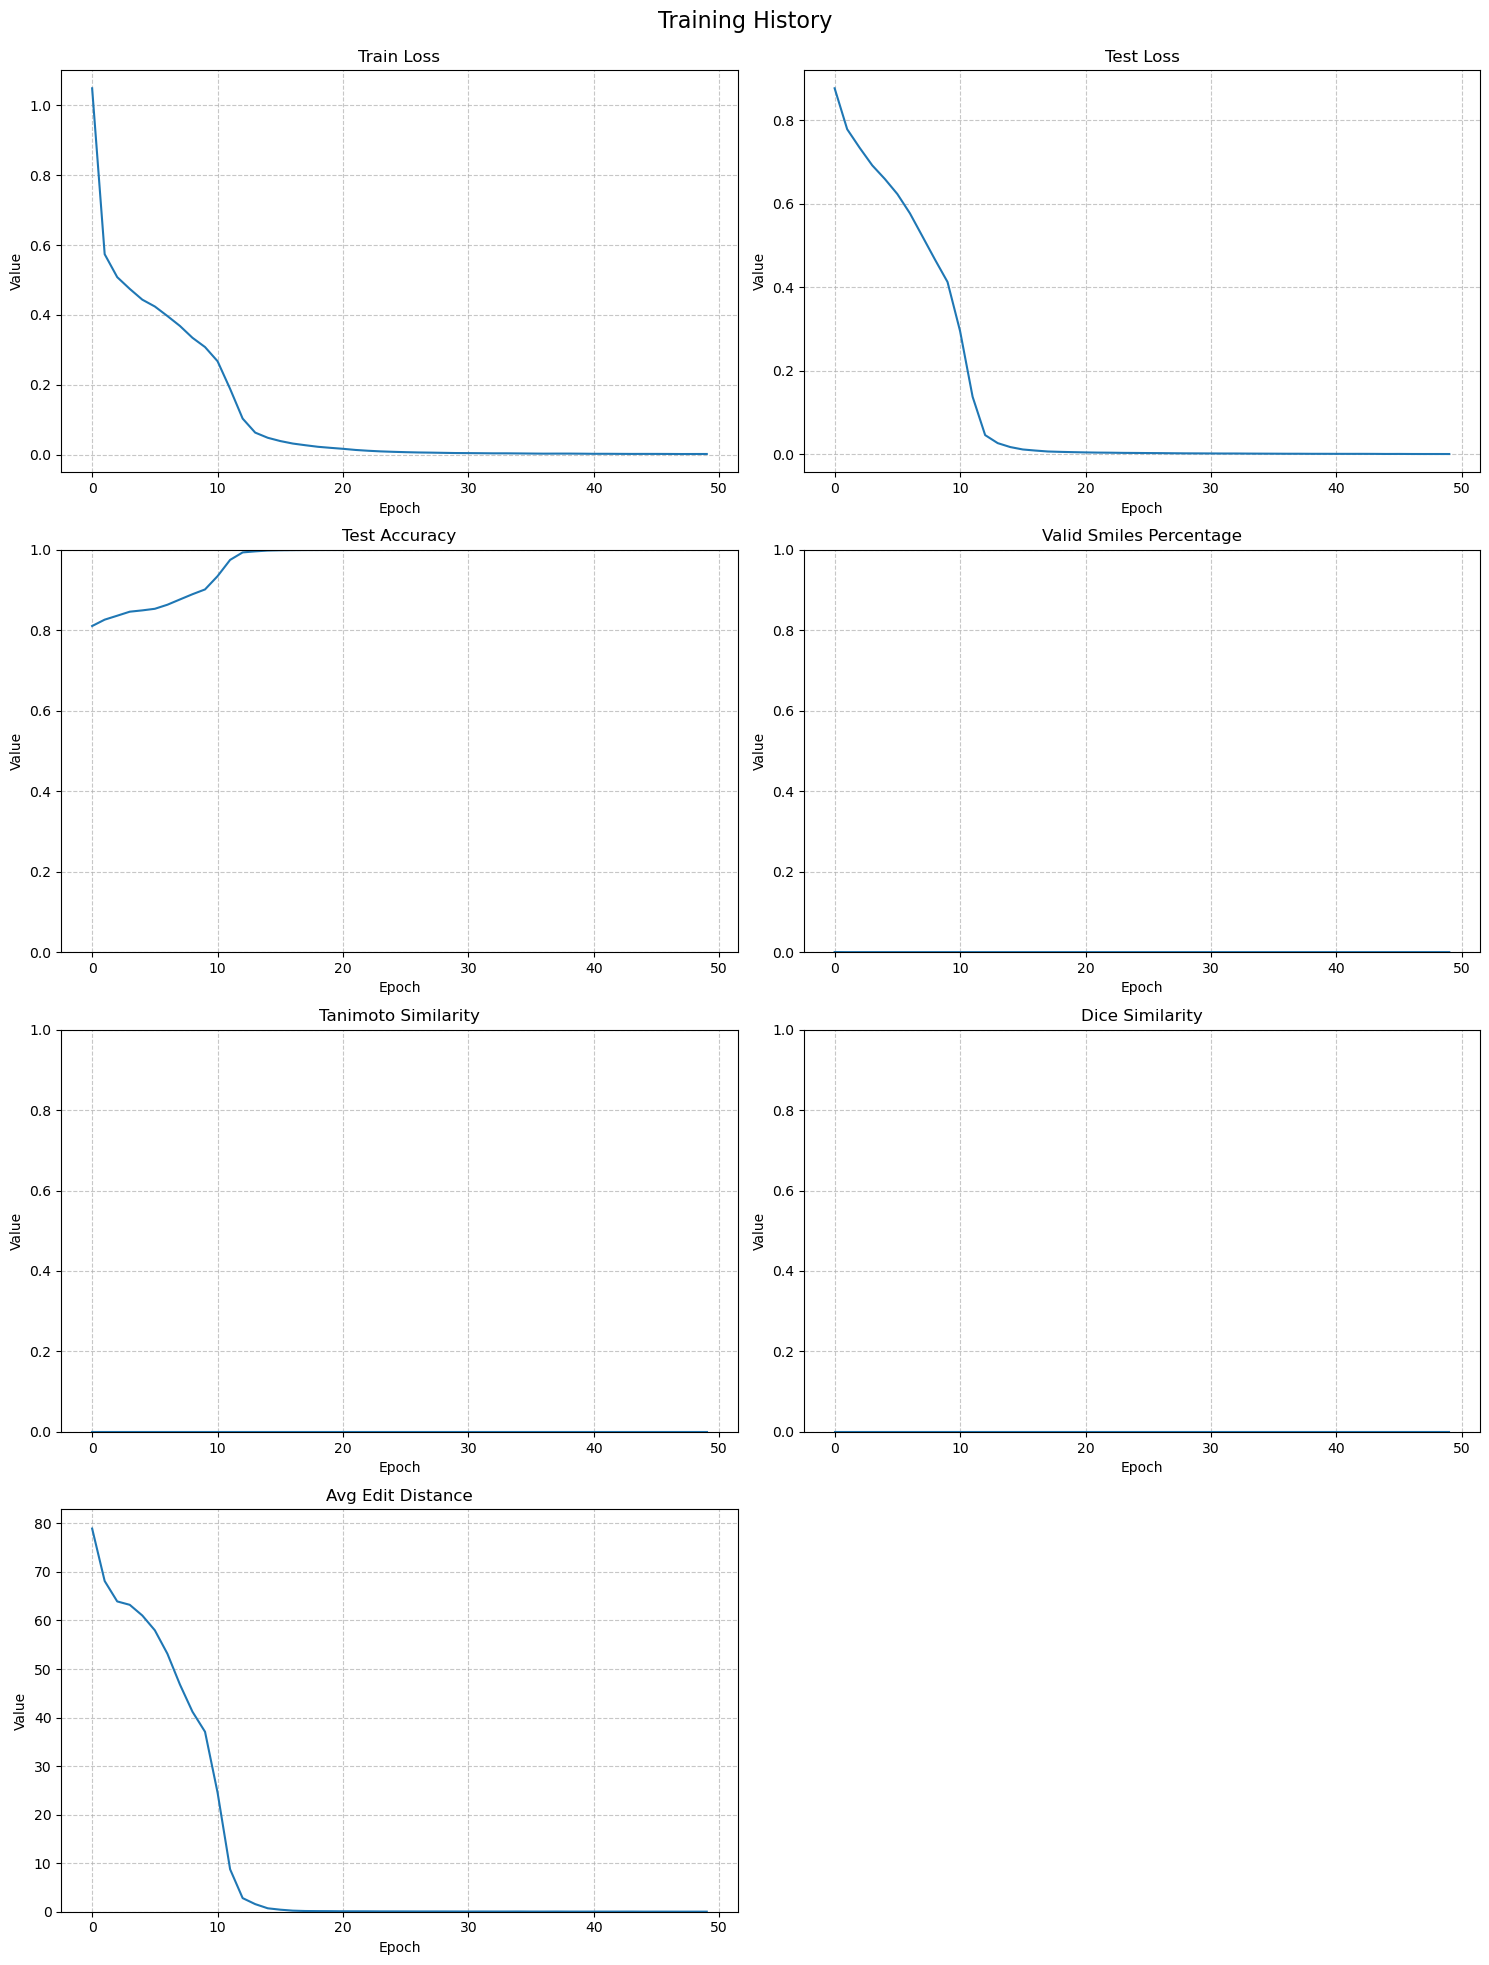

In [19]:
plot_training_history(history_atom)

In [20]:
results = {}
print(f"\nSpectra tokenized with {method} tokenization:")
print(f"\nSMILES tokenized with {'substructure'} tokenization")
smiles_vocab = smiles_vocabs['substructure']

train_loader, test_loader = load_tokenized_data_with_smiles(df, df, 
                                                            method, 
                                                            smiles_vocab, 
                                                            max_mz=max_mz)

#num_classes = len(label_encoder.classes_)
smiles_vocab_size = len(smiles_vocab)

# sample batch used for input dimensions
sample_batch, target_batch = next(iter(train_loader))
print("Spectra shape:", sample_batch.shape)
print("SMILES shape:", target_batch.shape)
embed_depth = sample_batch.shape[3]


Spectra tokenized with direct tokenization:

SMILES tokenized with substructure tokenization
Spectra shape: torch.Size([32, 1, 110, 16])
SMILES shape: torch.Size([32, 147])


In [21]:
model = MS_VIT_Seq2Seq(
    smiles_vocab_size=len(smiles_vocab),
    embed_depth=embed_depth,
    d_model=64,           # Reduced from 256
    nhead=4,              # Reduced from 8
    num_layers=2,         # Reduced from 6
    dim_feedforward=256,  # Reduced from 2048
    dropout=0.1,
    num_classes=None
)
print(model)

MS_VIT_Seq2Seq(
  (embedding): Linear(in_features=16, out_features=64, bias=True)
  (pos_encoder): PositionalEncoding()
  (transformer_encoder): TransformerEncoder(
    (layers): ModuleList(
      (0-1): 2 x TransformerEncoderLayer(
        (self_attn): MultiheadAttention(
          (out_proj): NonDynamicallyQuantizableLinear(in_features=64, out_features=64, bias=True)
        )
        (linear1): Linear(in_features=64, out_features=256, bias=True)
        (dropout): Dropout(p=0.1, inplace=False)
        (linear2): Linear(in_features=256, out_features=64, bias=True)
        (norm1): LayerNorm((64,), eps=1e-05, elementwise_affine=True)
        (norm2): LayerNorm((64,), eps=1e-05, elementwise_affine=True)
        (dropout1): Dropout(p=0.1, inplace=False)
        (dropout2): Dropout(p=0.1, inplace=False)
      )
    )
  )
  (smiles_embedding): Embedding(8536, 64)
  (transformer_decoder): TransformerDecoder(
    (layers): ModuleList(
      (0-1): 2 x TransformerDecoderLayer(
        (self_

In [22]:
optimizer = optim.Adam(model.parameters(), lr=0.0001)
criterion_cls = nn.CrossEntropyLoss()
criterion_seq = nn.CrossEntropyLoss()#ignore_index=smiles_vocab['<pad>'])

model_sub, history_sub = train_model_seq2seq(model, train_loader, test_loader, 
                                     optimizer, criterion_seq, 
                                     num_epochs=50, evaluate=True, verbose=1,
                                     checkpoint_path="./model_checkpoints/",
                                     meta_tag=(method+"_substructure"))

Saving checkpoints to ./model_checkpoints/checkpoint_15


Epoch 1/50 [Train]:   0%|          | 0/157 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 2/50 [Train]:   0%|          | 0/157 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 3/50 [Train]:   0%|          | 0/157 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 4/50 [Train]:   0%|          | 0/157 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 5/50 [Train]:   0%|          | 0/157 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 6/50 [Train]:   0%|          | 0/157 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 7/50 [Train]:   0%|          | 0/157 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 8/50 [Train]:   0%|          | 0/157 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 9/50 [Train]:   0%|          | 0/157 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 10/50 [Train]:   0%|          | 0/157 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 11/50 [Train]:   0%|          | 0/157 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 12/50 [Train]:   0%|          | 0/157 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 13/50 [Train]:   0%|          | 0/157 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 14/50 [Train]:   0%|          | 0/157 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 15/50 [Train]:   0%|          | 0/157 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 16/50 [Train]:   0%|          | 0/157 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 17/50 [Train]:   0%|          | 0/157 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 18/50 [Train]:   0%|          | 0/157 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 19/50 [Train]:   0%|          | 0/157 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 20/50 [Train]:   0%|          | 0/157 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 21/50 [Train]:   0%|          | 0/157 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 22/50 [Train]:   0%|          | 0/157 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 23/50 [Train]:   0%|          | 0/157 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 24/50 [Train]:   0%|          | 0/157 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 25/50 [Train]:   0%|          | 0/157 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 26/50 [Train]:   0%|          | 0/157 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 27/50 [Train]:   0%|          | 0/157 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 28/50 [Train]:   0%|          | 0/157 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 29/50 [Train]:   0%|          | 0/157 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 30/50 [Train]:   0%|          | 0/157 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 31/50 [Train]:   0%|          | 0/157 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 32/50 [Train]:   0%|          | 0/157 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 33/50 [Train]:   0%|          | 0/157 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 34/50 [Train]:   0%|          | 0/157 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 35/50 [Train]:   0%|          | 0/157 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 36/50 [Train]:   0%|          | 0/157 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 37/50 [Train]:   0%|          | 0/157 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 38/50 [Train]:   0%|          | 0/157 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 39/50 [Train]:   0%|          | 0/157 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 40/50 [Train]:   0%|          | 0/157 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 41/50 [Train]:   0%|          | 0/157 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 42/50 [Train]:   0%|          | 0/157 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 43/50 [Train]:   0%|          | 0/157 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 44/50 [Train]:   0%|          | 0/157 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 45/50 [Train]:   0%|          | 0/157 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 46/50 [Train]:   0%|          | 0/157 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 47/50 [Train]:   0%|          | 0/157 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 48/50 [Train]:   0%|          | 0/157 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 49/50 [Train]:   0%|          | 0/157 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 50/50 [Train]:   0%|          | 0/157 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/157 [00:00<?, ?it/s]

In [23]:
results_sub = evaluate_model_seq2seq(model, test_loader, smiles_vocab, test=True)

Sequence Accuracy: 0.9949
Average Sequence Loss: 0.0331
Valid SMILES Percentage: 87.84%
Average Tanimoto Similarity: 0.9901
Average Dice Similarity: 0.9944
Average Edit Distance: 0.71

True SMILES: O=C(OCCCCCC=CC=CCCCCCCCCCCCCC(=O)NC(CO)C(O)CCCCCCCCCCCCCCCCC)CCCCCCCC=CCC=CCCCCC
Pred SMILES: O=C(OCCCCCC=CC=CCCCCCCCCCCCCC(=O)NC(CO)C(O)CCCCCCCCCCCCCCCCC)CCCCCCCC=CCC=CCCCCC

True SMILES: O=C(NC(COP(=O)([O-])OCC[N+](C)(C)C)C(O)C=CCCC=CCCCCCCCCCCC)CCCCCCCCC=CCC=CCC=CCCCCC
Pred SMILES: O=C(NC(COP(=O)([O-])OCC[N+](C)(C)C)C(O)C=CCCC=CCCCCCCCCCCC)CCCCCCCCC=CCC=CCC=CCCCCC

True SMILES: O=C(NC(CO)C(O)CCCCC)CCCCCCCCCCCC=CCCCCCCCC
Pred SMILES: O=C(NC(CO)C(O)CCCCC)CCCCCCCCCCCC=CCCCCCCCC

True SMILES: O=C(O)CCCCCCCCCCCCC(OC(=O)CCCCCCCC=CCC=CCC=CCC=CCC=CCC)C
Pred SMILES: O=C(O)CCCCCCCCCCCCC(OC(=O)CCCCCCCC=CCC=CCC=CCC=CCC=CCC)C

True SMILES: O=C(OCCCCCCCCCCCCCCC=CCCCCCCCCCCCCCCC(=O)NC(CO)C(O)CCCCCCCCCCCCCCCCCCCCCC)CCCCCCCC=CCCCCCC
Pred SMILES: O=C(OCCCCCCCCCCCCCCC=CCCCCCCCCCCCCCCC(=O)NC(CO)C(O)CCCCCCCCC

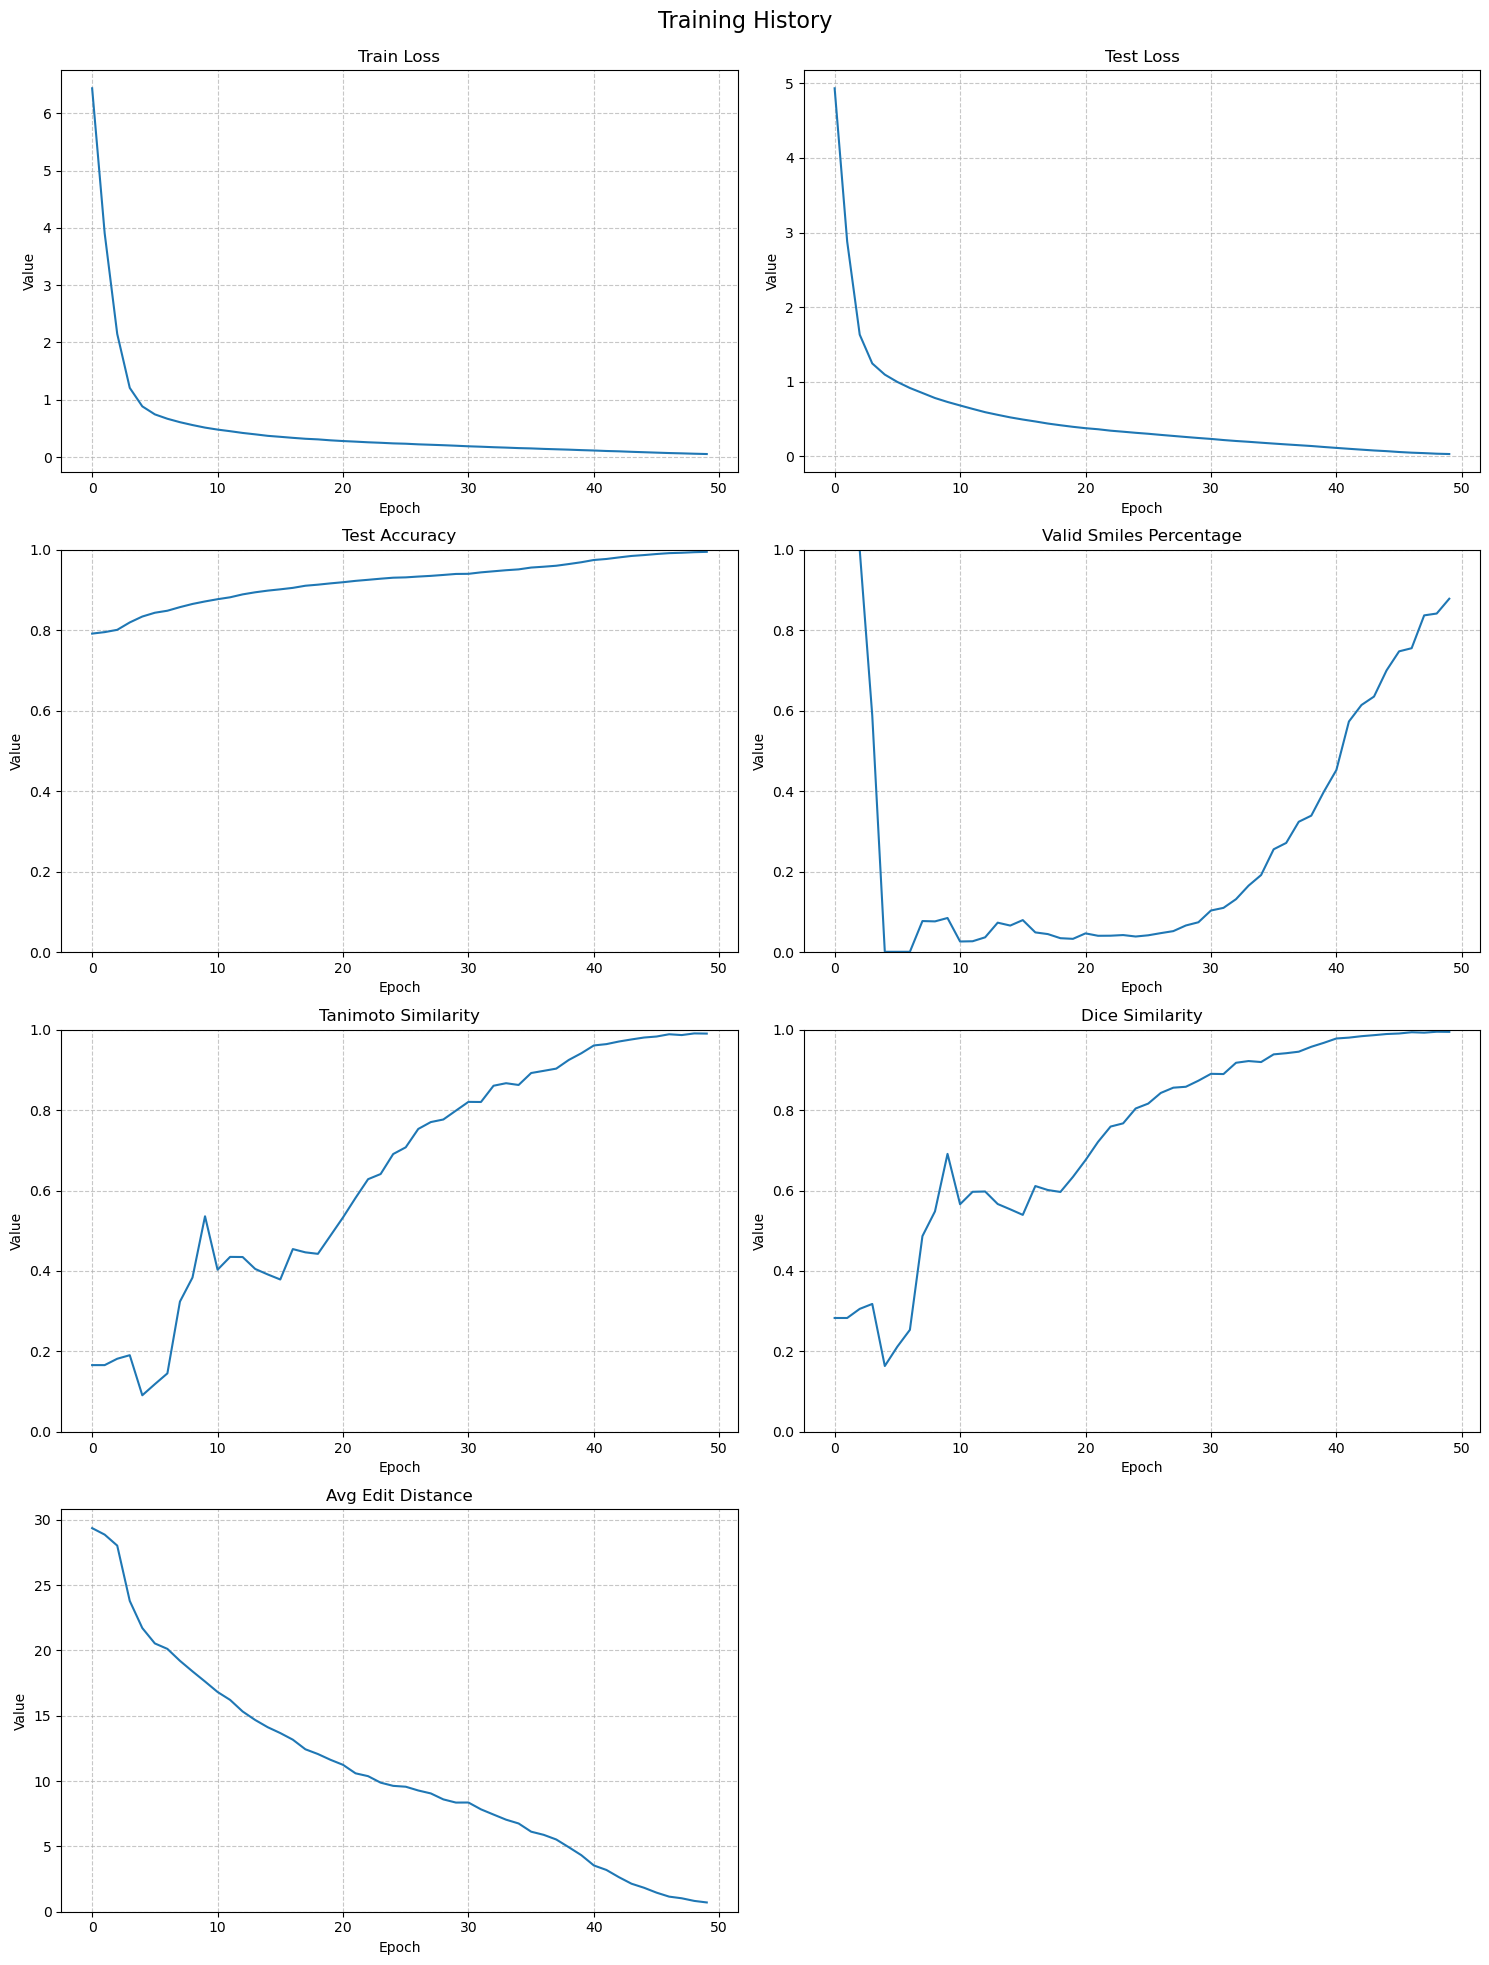

In [24]:
plot_training_history(history_sub)

In [25]:
history_char

{'train_loss': {0: 1.4576635288584763,
  1: 0.8043439809683781,
  2: 0.6638169095015071,
  3: 0.593753238772131,
  4: 0.5457595358988282,
  5: 0.5045675287960442,
  6: 0.46626617593370423,
  7: 0.4397854432938205,
  8: 0.41579562064948355,
  9: 0.39132987902422617,
  10: 0.3712155319702853,
  11: 0.3500152148638561,
  12: 0.3320502010500355,
  13: 0.31649395434340094,
  14: 0.2993641376115714,
  15: 0.28638444432787075,
  16: 0.27426148267688266,
  17: 0.26216709091784846,
  18: 0.24844671007554242,
  19: 0.23506704551778781,
  20: 0.22166959106162853,
  21: 0.20019053909808968,
  22: 0.14815161704637442,
  23: 0.09405436618312908,
  24: 0.062286003474976606,
  25: 0.04765556112026713,
  26: 0.039365937921461785,
  27: 0.033613685554095135,
  28: 0.030491322261180467,
  29: 0.026531768642413387,
  30: 0.024983354571281344,
  31: 0.022710788039977003,
  32: 0.02107747514868618,
  33: 0.019528233214833175,
  34: 0.01795460721537186,
  35: 0.01737101290042803,
  36: 0.015842662169153143,


In [26]:
history_atom

{'train_loss': {0: 1.048519862685234,
  1: 0.5738072649688478,
  2: 0.50820915201667,
  3: 0.4745899110463015,
  4: 0.44379348189208156,
  5: 0.42422162575326905,
  6: 0.39702659105039706,
  7: 0.36858247173060277,
  8: 0.3346842161978886,
  9: 0.3082142477961862,
  10: 0.2676612381722517,
  11: 0.18852568042885726,
  12: 0.10353222745619002,
  13: 0.0634503152434993,
  14: 0.04868309384888145,
  15: 0.03928873957294947,
  16: 0.03212954988999731,
  17: 0.0273404677938314,
  18: 0.022881908502405995,
  19: 0.019877108324105573,
  20: 0.017094834399213835,
  21: 0.013832711445606627,
  22: 0.011530502844649326,
  23: 0.009742976421383536,
  24: 0.00848847515673442,
  25: 0.00747381220423397,
  26: 0.006651289633528632,
  27: 0.00616955094834327,
  28: 0.005546979153095774,
  29: 0.004979622866187221,
  30: 0.0047940202709880605,
  31: 0.004500388743943137,
  32: 0.004147058036949509,
  33: 0.004180789236305578,
  34: 0.0038875073586015184,
  35: 0.0035522177379435985,
  36: 0.0032444004

In [27]:
history_sub

{'train_loss': {0: 6.434800226976917,
  1: 3.903686073934956,
  2: 2.1485179814563433,
  3: 1.2063222307308463,
  4: 0.8839560196657849,
  5: 0.7441392601675288,
  6: 0.6677366889965762,
  7: 0.6077876301707735,
  8: 0.5578480454007532,
  9: 0.5132000163482253,
  10: 0.4785692217243705,
  11: 0.45056848787957693,
  12: 0.4200747388942986,
  13: 0.39571399502693466,
  14: 0.36962802356975094,
  15: 0.35249773408197294,
  16: 0.33452922922031136,
  17: 0.31840788853016627,
  18: 0.3078049451682218,
  19: 0.29122252724352915,
  20: 0.27863249932504763,
  21: 0.2683459090389264,
  22: 0.256912041621603,
  23: 0.24844981056110116,
  24: 0.23794673772374536,
  25: 0.23198726251246823,
  26: 0.22124643272655026,
  27: 0.2137964523521958,
  28: 0.20601870774463482,
  29: 0.19706886209500063,
  30: 0.18702789770949418,
  31: 0.17989477401326417,
  32: 0.17101464045655196,
  33: 0.16406657556249837,
  34: 0.15556778583177336,
  35: 0.15013995500886515,
  36: 0.1415963943122299,
  37: 0.134941944

In [28]:
for key in history_char.keys():
    print(key)

train_loss
test_accuracy
test_loss
valid_smiles_percentage
tanimoto_similarity
dice_similarity
avg_edit_distance


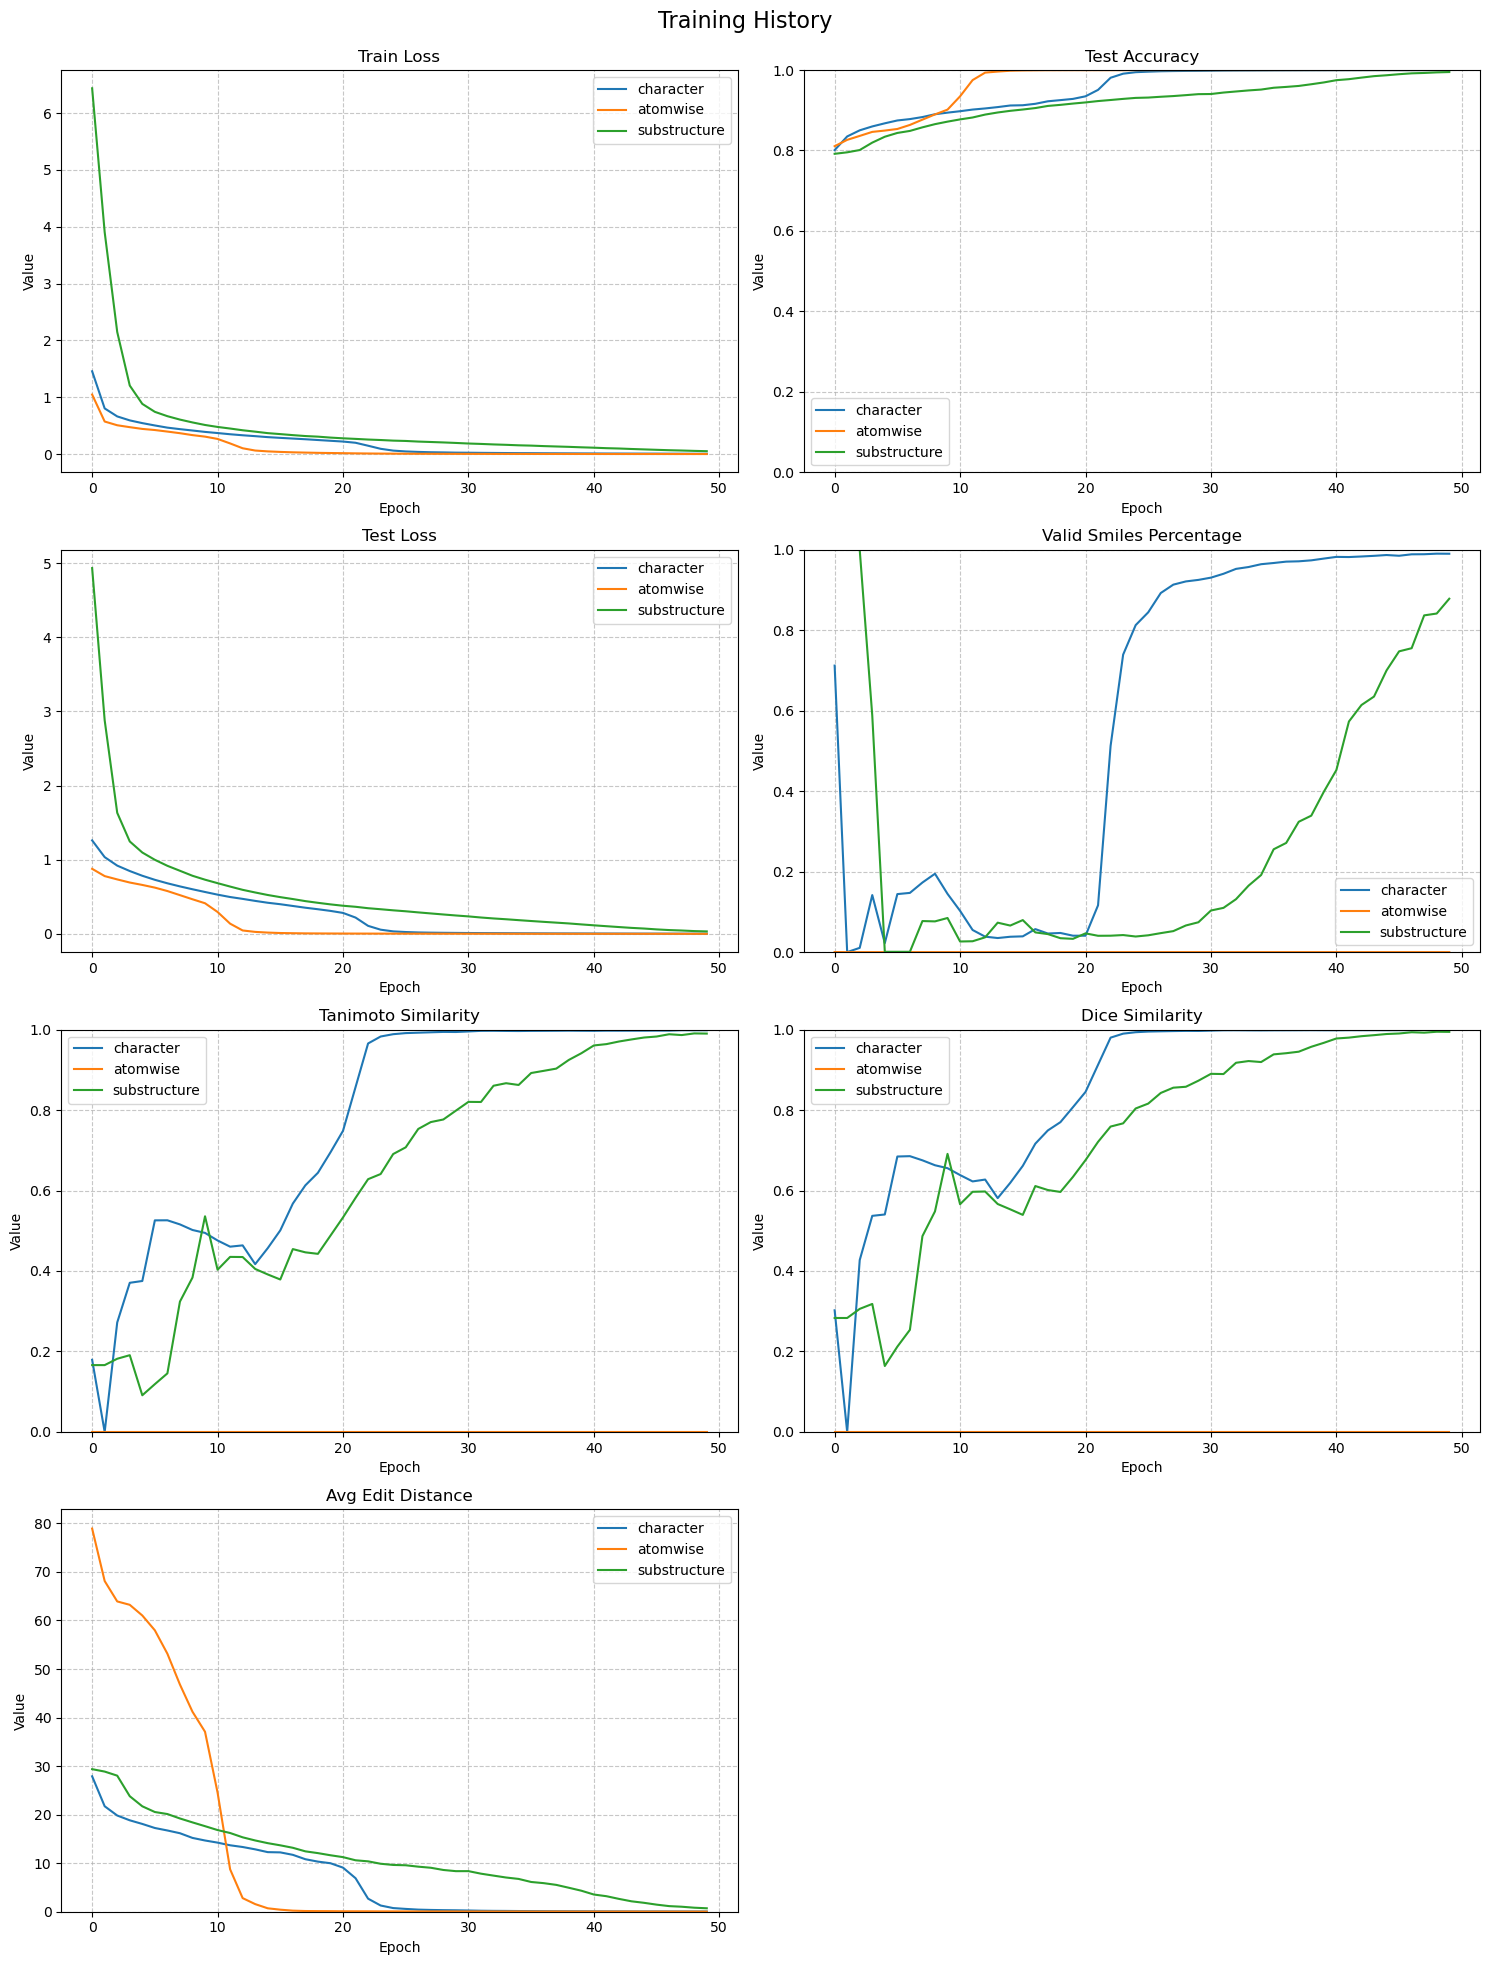

In [32]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 20))
fig.suptitle('Training History', fontsize=16)

for idx, metric in enumerate(history_char.keys()):
    row = idx // 2
    col = idx % 2
    ax = axes[row, col]
    
    for history, label in zip([history_char, history_atom, history_sub], ['character', 'atomwise', 'substructure']):
        values = list(history[metric].values())
        epochs = list(history[metric].keys())
        
        ax.plot(epochs, values, label=label)
    
    ax.set_title(metric.replace('_', ' ').title())
    ax.set_xlabel('Epoch')
    ax.set_ylabel('Value')
    
    # Add grid for better readability
    ax.grid(True, linestyle='--', alpha=0.7)
    
    # Fix y-axis scale
    if metric in ['test_accuracy', 'valid_smiles_percentage', 'tanimoto_similarity', 'dice_similarity']:
        ax.set_ylim(0, 1)
    elif metric == 'avg_edit_distance':
        ax.set_ylim(bottom=0)  # Start from 0, but let the upper limit be determined automatically
    ax.legend()

# Remove the last empty subplot
fig.delaxes(axes[3][1])

plt.tight_layout()
plt.subplots_adjust(top=0.95)  # Adjust for the suptitle
plt.show()